In [501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
warnings.filterwarnings('ignore')
os.chdir(r"C:\Users\e430420\Downloads\Learning\Scripts\INPUT\Classification")

In [502]:
df = pd.read_csv(r"C:\Users\e430420\Downloads\Learning\Scripts\INPUT\Classification\laptops_dataset_final_600.csv")

df = df.rename(columns={'overall_rating':'Avg_rating_product','no_ratings':'Total_no_rating_received',
                'no_reviews':'Total_no_review_written','rating':'Individual_rating_user'})

In [503]:
df.columns

Index(['product_name', 'Avg_rating_product', 'Total_no_rating_received',
       'Total_no_review_written', 'Individual_rating_user', 'title', 'review'],
      dtype='object')

#### Extract product name()

In [504]:
df['Product_split'] = df['product_name'].apply(lambda x: x.split())

df['Brand_name'] = df['Product_split'].apply(lambda x: x[0])

df['Series_name'] = df['Product_split'].apply(lambda x: ' '.join(x[1:5]))

df

,product_name,Avg_rating_product,Total_no_rating_received,Total_no_review_written,Individual_rating_user,title,review,Product_split,Brand_name,Series_name
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ...","[Apple, MacBook, AIR, Apple, M2, -, (8, GB/256...",Apple,MacBook AIR Apple M2
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...,"[Apple, MacBook, AIR, Apple, M2, -, (8, GB/256...",Apple,MacBook AIR Apple M2
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...,"[Apple, MacBook, AIR, Apple, M2, -, (8, GB/256...",Apple,MacBook AIR Apple M2
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b...","[Apple, MacBook, AIR, Apple, M2, -, (8, GB/256...",Apple,MacBook AIR Apple M2
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...,"[Apple, MacBook, AIR, Apple, M2, -, (8, GB/256...",Apple,MacBook AIR Apple M2
...,...,...,...,...,...,...,...,...,...,...
24108,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,MSI Laptop is high performance and the best. c...,"[MSI, Modern, 14, Intel, Core, i5, 13th, Gen, ...",MSI,Modern 14 Intel Core
24109,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,Excellent performance best laptop.,"[MSI, Modern, 14, Intel, Core, i5, 13th, Gen, ...",MSI,Modern 14 Intel Core
24110,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,4,"Good product, Lacks features.",Decent battery life. Exceptional build quality...,"[MSI, Modern, 14, Intel, Core, i5, 13th, Gen, ...",MSI,Modern 14 Intel Core
24111,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,3,Nice,The product does not support facial recognitio...,"[Lenovo, IdeaPad, 5, 2-in-1, WUXGA, IPS, AMD, ...",Lenovo,IdeaPad 5 2-in-1 WUXGA


Text(0.5, 1.0, 'Most Popular laptop brand based on Review')

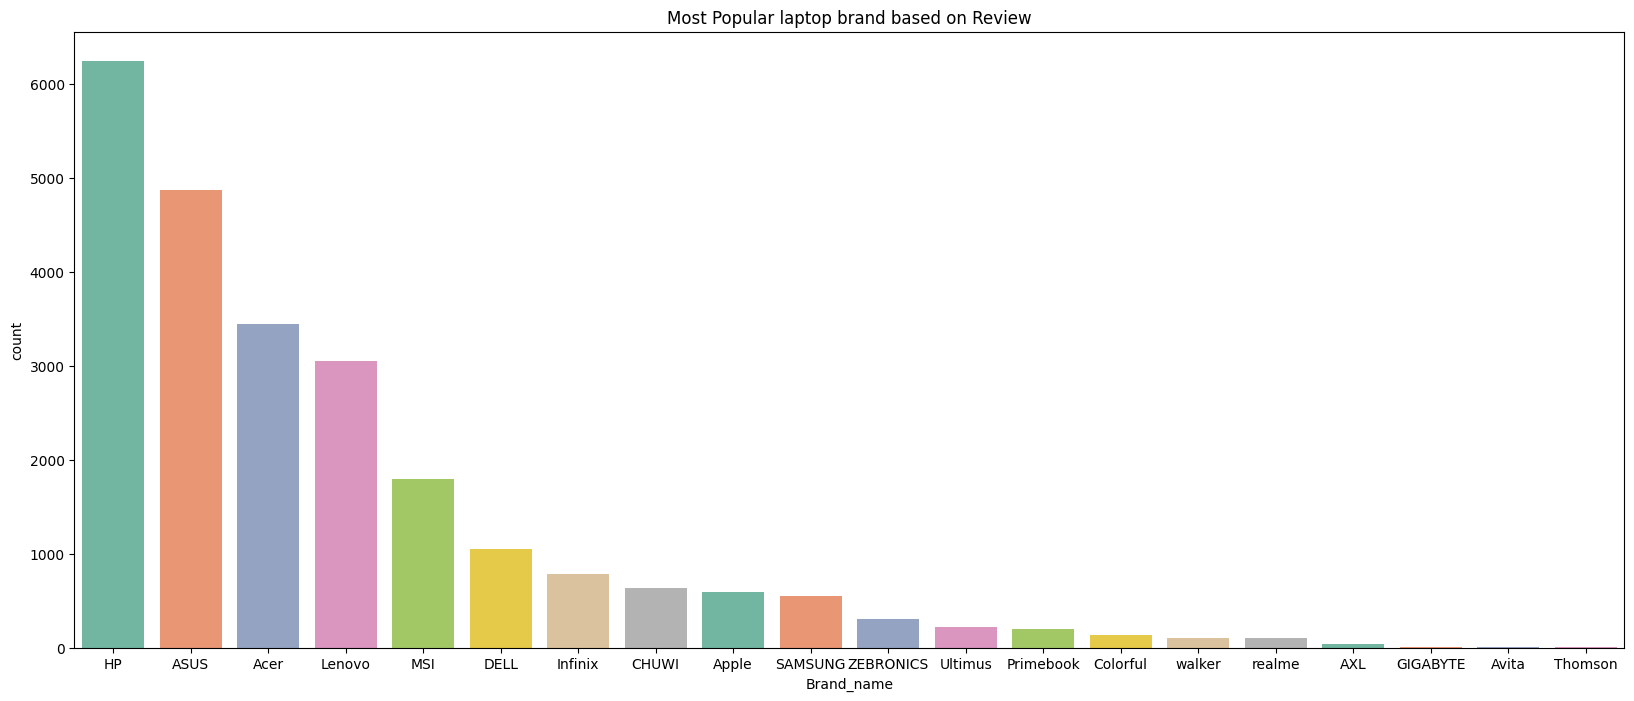

In [505]:
plt.figure(figsize=(20,8))
sns.countplot(x='Brand_name', data=df, order=df['Brand_name'].value_counts().index, palette='Set2')
plt.title('Most Popular laptop brand based on Review')

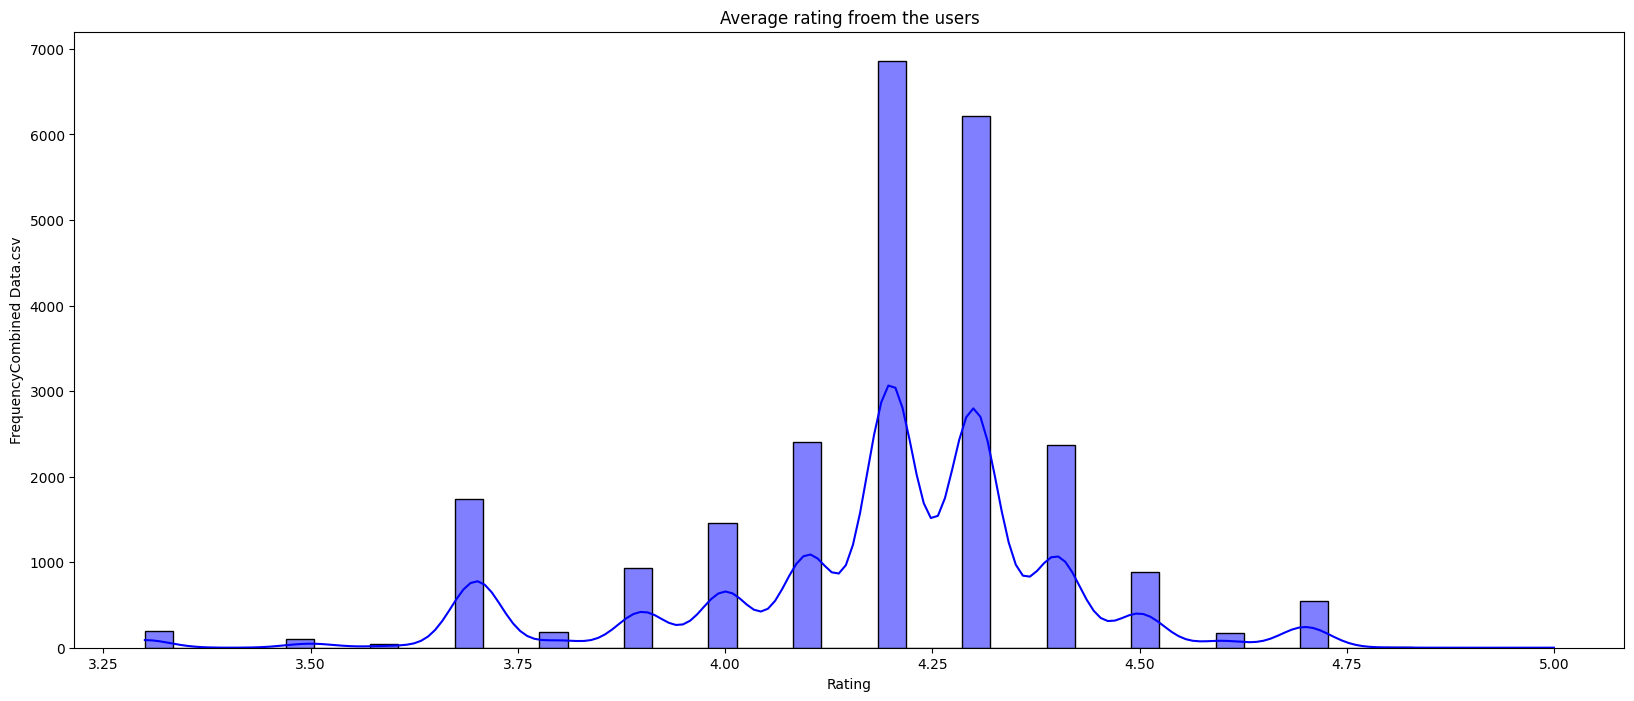

In [506]:
plt.figure(figsize=(20,8))

sns.histplot(df['Avg_rating_product'], bins=50, kde = True,color = 'Blue')
plt.title('Average rating froem the users')
plt.xlabel('Rating')
plt.ylabel('Frequency'"Combined Data.csv")
plt.show()

<Axes: ylabel='Brand_name'>

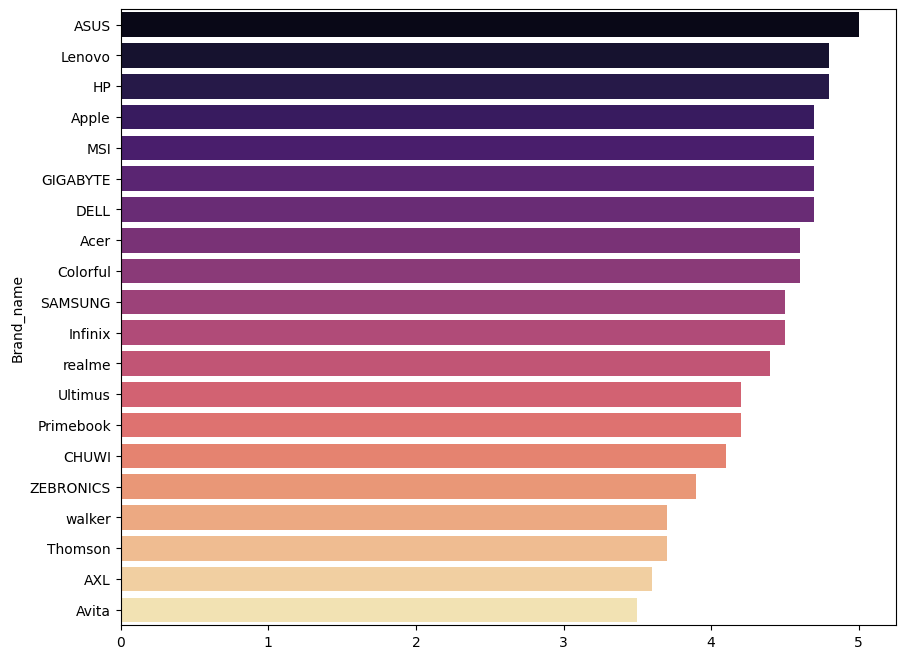

In [ ]:
plt.figure(figsize=(10,8))
top_laptop = df.groupby('Brand_name')['Avg_rating_product'].max().sort_values(ascending=False)

sns.barplot(x = top_laptop.values, y = top_laptop.index, palette = 'magma')

#### Extract processor name

In [524]:
processor_name = ['Intel','AMD','M2','M3','Qualcomm','MediaTek Kompanio 520','MediaTek MT8183','MediaTek MT8788','MediaTek Kompanio 1200']

df['Processor'] = df['product_name'].apply(lambda x: next((p for p in processor_name if p in x), 'Unknown'))


#### Frequency of count of each processors

<Axes: xlabel='Processor', ylabel='count'>

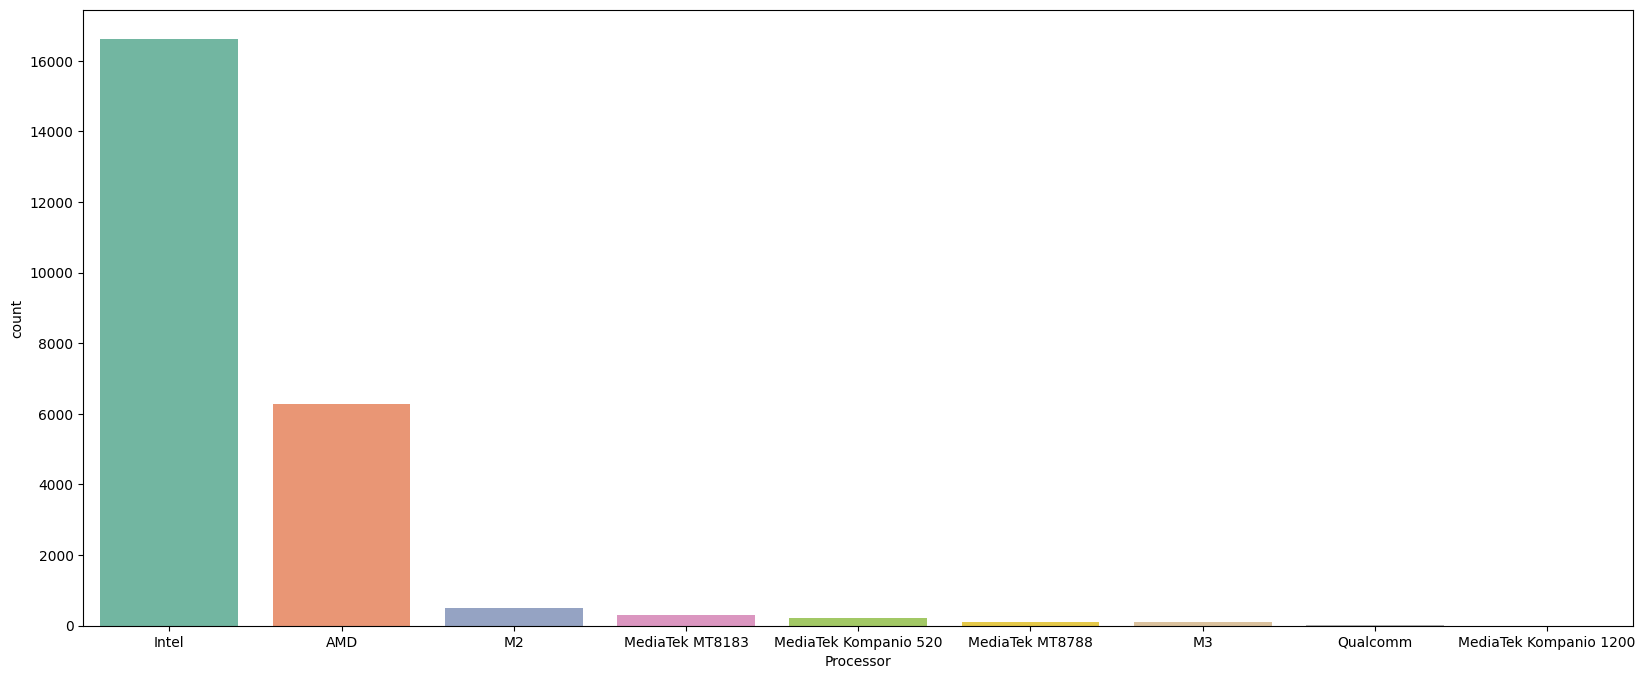

In [531]:
plt.figure(figsize=(20,8))

sns.countplot(x = 'Processor', order = df['Processor'].value_counts().index, data = df, palette='Set2')

####  Processor wise average rating from users

<Axes: ylabel='Processor'>

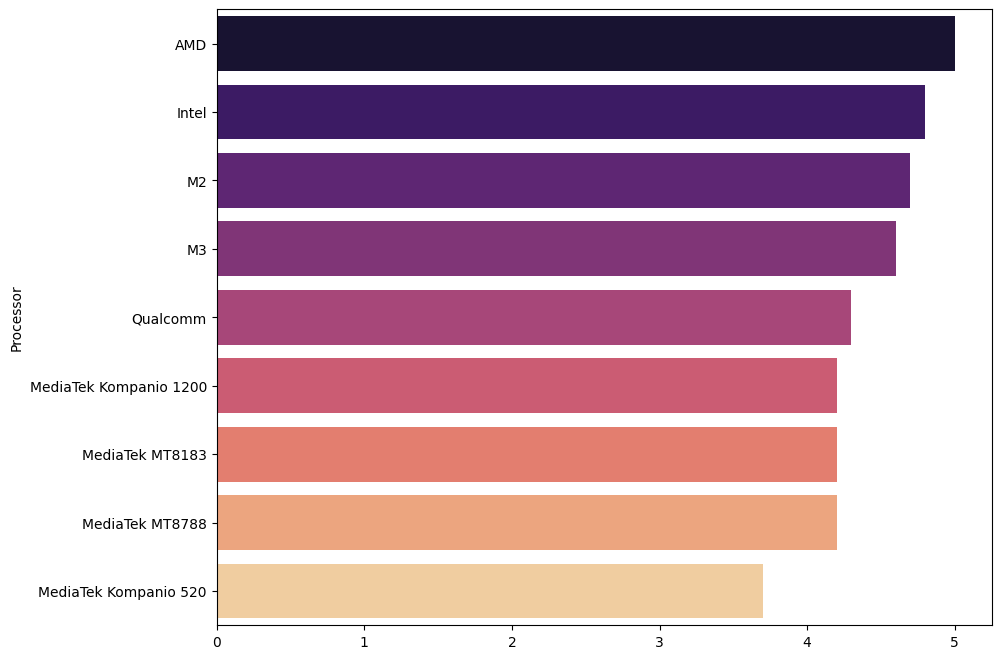

In [540]:
plt.figure(figsize=(10,8))
top_laptop = df.groupby('Processor')['Avg_rating_product'].max().sort_values(ascending=False)

sns.barplot(x = top_laptop.values, y = top_laptop.index, palette = 'magma')

In [545]:
df.columns

Index(['product_name', 'Avg_rating_product', 'Total_no_rating_received',
       'Total_no_review_written', 'Individual_rating_user', 'title', 'review',
       'Product_split', 'Brand_name', 'Series_name', 'Processor'],
      dtype='object')

####  Processor wise individual rating from users

<Axes: ylabel='Processor'>

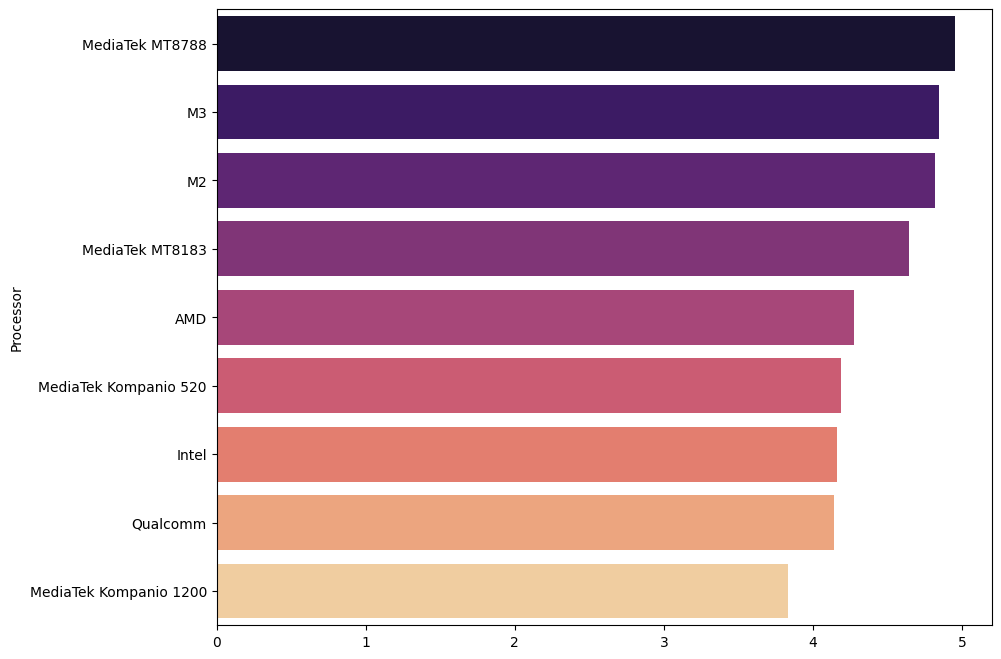

In [548]:
plt.figure(figsize=(10,8))
top_laptop = df.groupby('Processor')['Individual_rating_user'].mean().sort_values(ascending=False)

sns.barplot(x = top_laptop.values, y = top_laptop.index, palette = 'magma')

In [544]:
brand_wise_processor = pd.DataFrame(df.groupby('Brand_name')['Processor'].value_counts())

brand_wise_processor

count
Brand_name Processor                    
ASUS       Intel                    3317
           AMD                      1556
           Qualcomm                    2
AXL        Intel                      33
Acer       Intel                    2500
           AMD                       942
Apple      M2                        500
           M3                         96
Avita      Intel                       3
CHUWI      Intel                     638
Colorful   Intel                     135
DELL       Intel                     939
           AMD                       110
GIGABYTE   Intel                       4
HP         Intel                    3819
           AMD                      2219
           MediaTek MT8183           200
           MediaTek Kompanio 1200      6
Infinix    Intel                     780
Lenovo     Intel                    1845
           AMD                       991
           MediaTek Kompanio 520     210
           Qualcomm                    5
MSI        Intel                    1330
           AMD                       462
Primebook  MediaTek MT8183           100
           MediaTek MT8788           100
SAMSUNG    Intel                     551
Thomson    Intel                       2
Ultimus    Intel                     218
ZEBRONICS  Intel                     300
realme     Intel                     100
walker     Intel                     100

In [537]:
df['Processor'].value_counts()

Processor
Intel                     16614
AMD                        6280
M2                          500
MediaTek MT8183             300
MediaTek Kompanio 520       210
MediaTek MT8788             100
M3                           96
Qualcomm                      7
MediaTek Kompanio 1200        6
Name: count, dtype: int64

<Axes: xlabel='Avg_rating_product', ylabel='Count'>

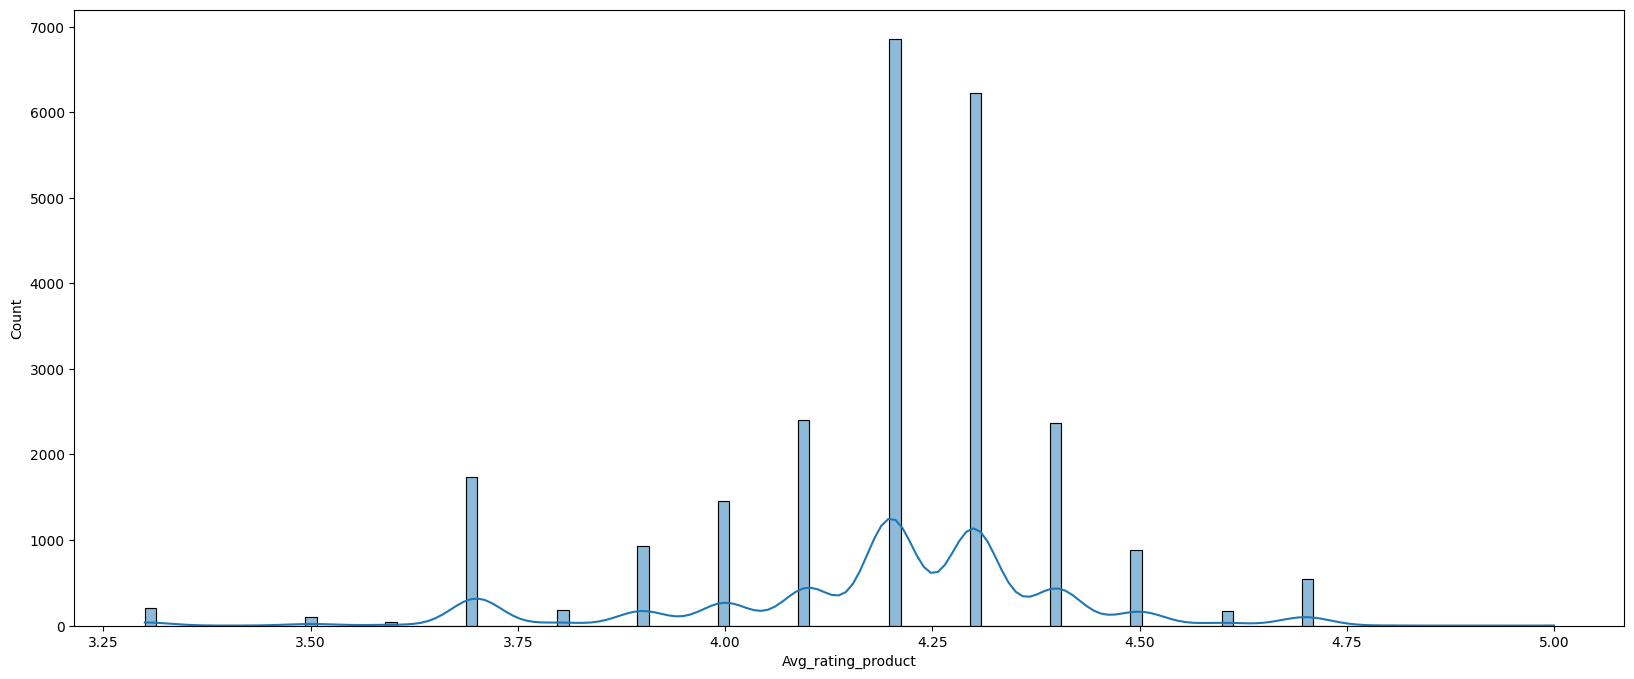

In [510]:
plt.figure(figsize=(20,8))
sns.histplot(x = 'Avg_rating_product', data = df,kde = True)

<Axes: xlabel='Brand_name', ylabel='Avg_rating_product'>

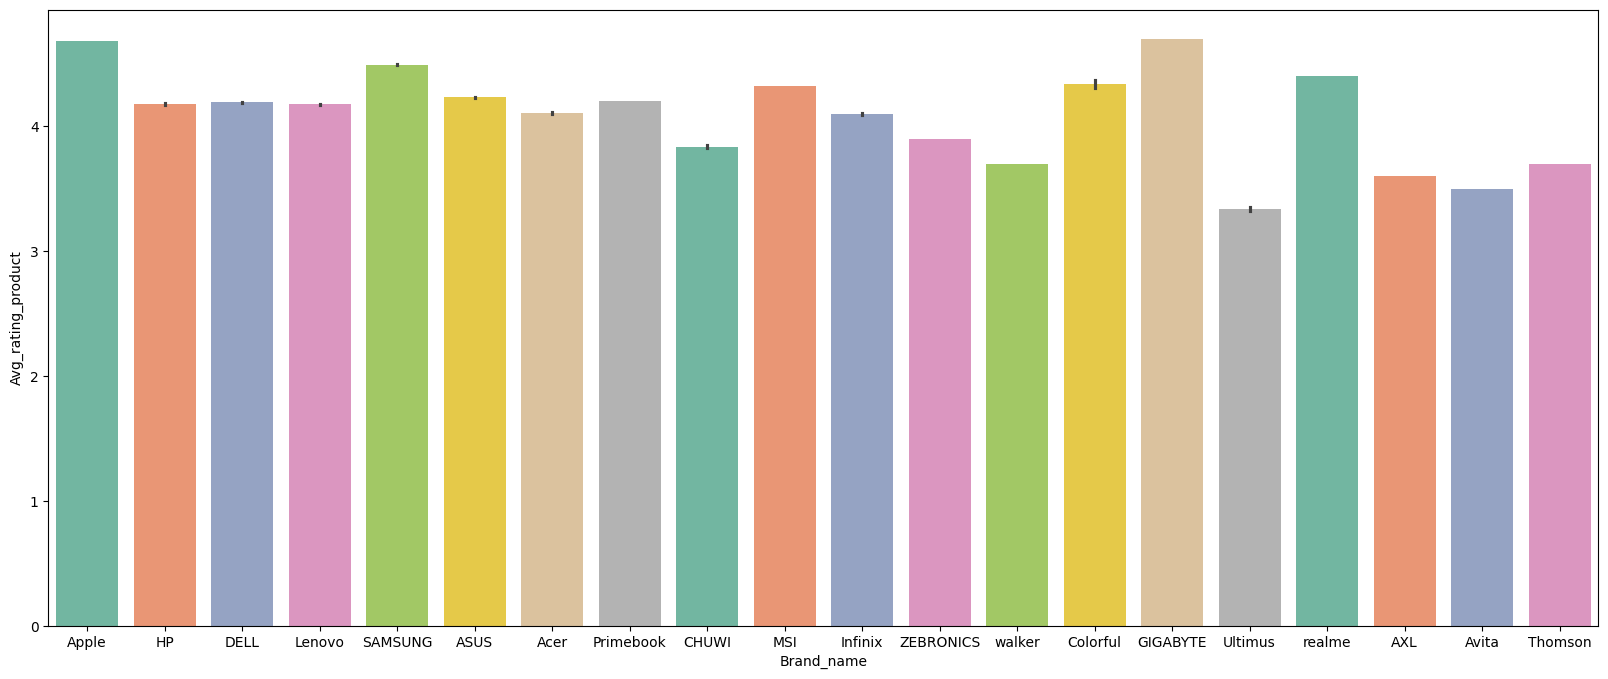

In [511]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Brand_name', y = 'Avg_rating_product', data = df, palette = 'Set2')

### For apple

In [512]:
# df_apple = df[(df['Brannd_name']=='Apple')]

# df_apple['series'] = df['Product_split'].apply(lambda x:x[1])

# df_apple['Processor'] = df['Product_split'].apply(lambda x: str('Apple')+str(' ')+ x[4])

# df_apple['RAM'] = df['Product_split'].apply(lambda x: x[6].strip("()") +str(' ')+ str('GB'))

# df_apple['Storage'] = df['Product_split'].apply(lambda x: x[7].strip("(/GB)") +str(' ')+ str('GB') + str('SSD'))

# df_apple['OS'] = df['Product_split'].apply(lambda x: " ".join([word for word in x if  "OS" in word or "Monterey" in word]).strip("()...)"))

# df_apple
   

In [513]:
# df_HP = df[(df['Brannd_name']=='HP')]

# df_HP['series'] = df['Product_split'].apply(lambda x:x[1])

# df_HP['Processor'] = df['Product_split'].apply(lambda x: " ".join(x[2:8]).strip("()"))

# df_HP['RAM'] = df['Product_split'].apply(lambda x: x[9].strip("()") +str(' ')+ str('GB'))

# df_HP['Storage'] = df['Product_split'].apply(lambda x: x[-3].strip("(GB/)")+str(' ')  + str('GB') + str('SSD'))

# df_HP['OS'] = 'Windows'



In [514]:
# df_DELL = df[(df['Brannd_name']=='DELL')]

# df_DELL['series'] = df['Product_split'].apply(lambda x:" ".join(x[1:3]))

# df_DELL['Processor'] = df['Product_split'].apply(lambda x: " ".join(x[2:8]).strip("()"))

# df_DELL['RAM'] = df['Product_split'].apply(lambda x: x[-3].strip("()") +str(' ')+ str('GB'))

# df_DELL['Storage'] = df['Product_split'].apply(lambda x: x[-2].strip("(GB/)")+str(' ')  + str('GB') + str('SSD'))

# df_DELL['OS'] = 'Windows'

In [515]:
# df_LENOVO = df[(df['Brannd_name']=='Lenovo')]

# df_LENOVO['series'] = df['Product_split'].apply(lambda x:"".join(x[1]))

# df_LENOVO['Processor'] = df['Product_split'].apply(lambda x: " ".join(x[2:5]).strip("()"))

# df_LENOVO['RAM'] = df['Product_split'].apply(lambda x: x[-5].strip("()") +str(' ')+ str('GB'))

# df_LENOVO['Storage'] = df['Product_split'].apply(lambda x: ''.join(x[7:10]).strip("(GB/)"))

# df_LENOVO['OS'] = df['Product_split'].apply(lambda x: " ".join([word for word in x if 'Chromebook' in word or 'Windows' in word]))

# df_LENOVO